In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime as dt
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
canada_coronavirus = pd.read_csv('cases_recoveries_deaths_tests.csv')

In [3]:
canada_coronavirus.head()

,Unnamed: 0,date_report,cases,cumulative_cases_x,recovered,cumulative_recovered_x,deaths,cumulative_deaths_x,active_cases,tests,percent_positive
0,0,25-01-2020,1,1,0.0,0,0,0,1,0,0.0
1,1,26-01-2020,0,1,0.0,0,0,0,1,0,0.0
2,2,27-01-2020,1,2,0.0,0,0,0,2,0,0.0
3,3,28-01-2020,1,3,0.0,0,0,0,3,0,0.0
4,4,29-01-2020,0,3,0.0,0,0,0,3,0,0.0


In [5]:
# Importing required files
covid = pd.read_csv("final_canada.csv")
c19 = pd.read_csv("c19.csv")
c19 = c19[c19['prname'] != 'Canada']

covid["date"] = pd.to_datetime(covid["date"])

In [6]:
#Grouping differnent types of cases as per the date
reqar = ['date','cases','recovered','deaths']

A = covid[reqar[0]]
B = covid[reqar[1]]
C = covid[reqar[2]]
D = covid[reqar[3]]

datewise = pd.concat([A, B, C, D], axis=1, join="inner")
datewise.shape

(451, 4)

In [7]:
print("Basic Information")
print("Total number of Confirmed cases in Canada",datewise["cases"].sum())
print("Total number of Recovered cases in Canada",datewise["recovered"].sum())
print("Total number of Death cases in Canada",datewise["deaths"].sum())

Basic Information
Total number of Confirmed cases in Canada 1139174
Total number of Recovered cases in Canada 1019785
Total number of Death cases in Canada 23652


In [8]:
cols = [1,2,4,6]
df1 = canada_coronavirus[canada_coronavirus.columns[cols]]

In [9]:
x = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in df1.date_report]
y = df1.cases

<Figure size 2160x720 with 0 Axes>

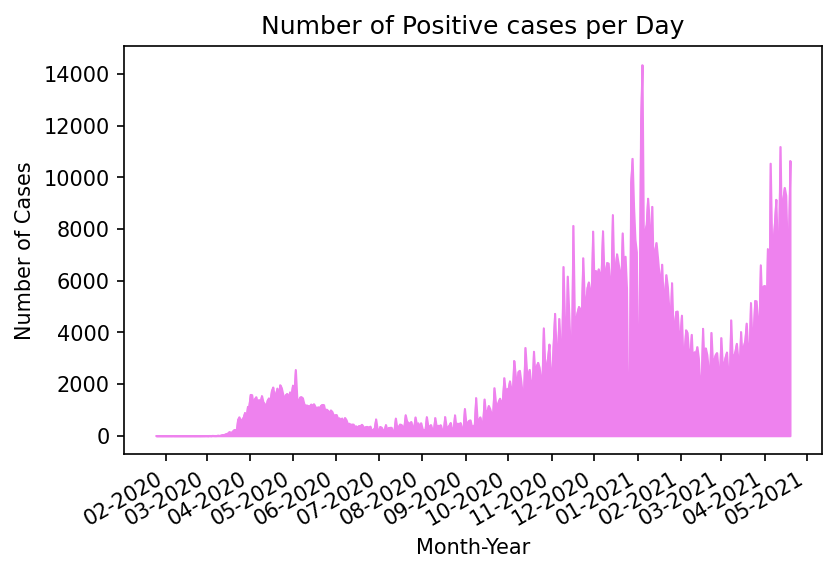

In [10]:
plt.figure(figsize=(30,10))
plt.figure(dpi=150)
plt.plot(x,y,color = 'violet',linewidth =0.4)
plt.fill_between(x, y, color='violet')
plt.xlabel('Month-Year')
plt.ylabel('Number of Cases')
plt.title('Number of Positive cases per Day')
date_form = DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.savefig('cases.png')

In [11]:
x = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in df1.date_report]
y = df1['recovered']+df1['deaths']

<Figure size 2160x720 with 0 Axes>

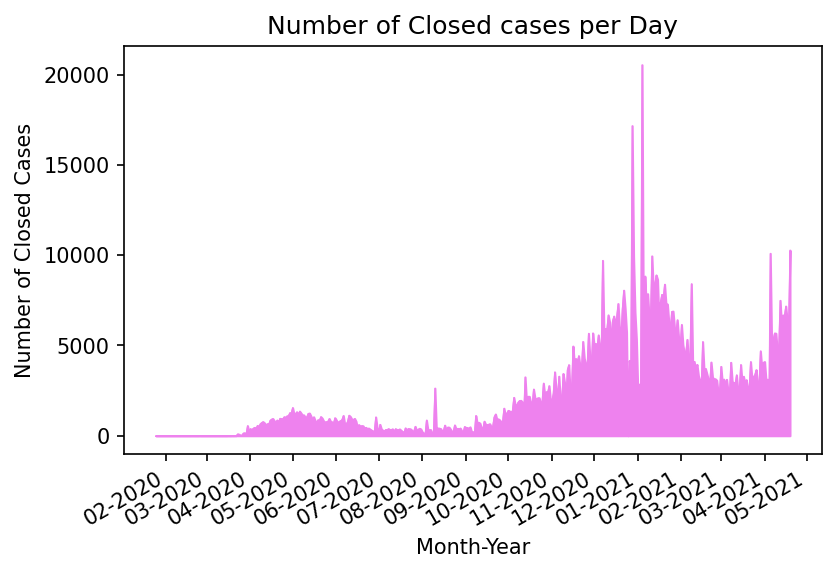

In [12]:
plt.figure(figsize=(30,10))
plt.figure(dpi=150)
plt.plot(x,y,color = 'violet',linewidth =0.4)
plt.fill_between(x, y, color='violet')
plt.xlabel('Month-Year')
plt.ylabel('Number of Closed Cases')
plt.title('Number of Closed cases per Day')
date_form = DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.savefig('closed_cases.png')

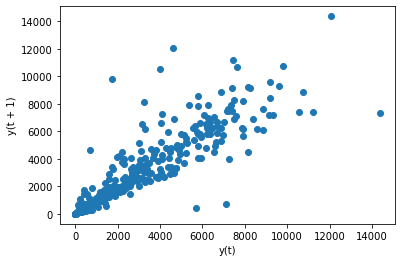

In [13]:
pd.plotting.lag_plot(df1['cases'])

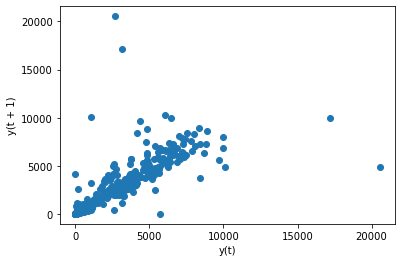

In [14]:
pd.plotting.lag_plot(df1['recovered']+df1['deaths'])

<Figure size 2160x720 with 0 Axes>

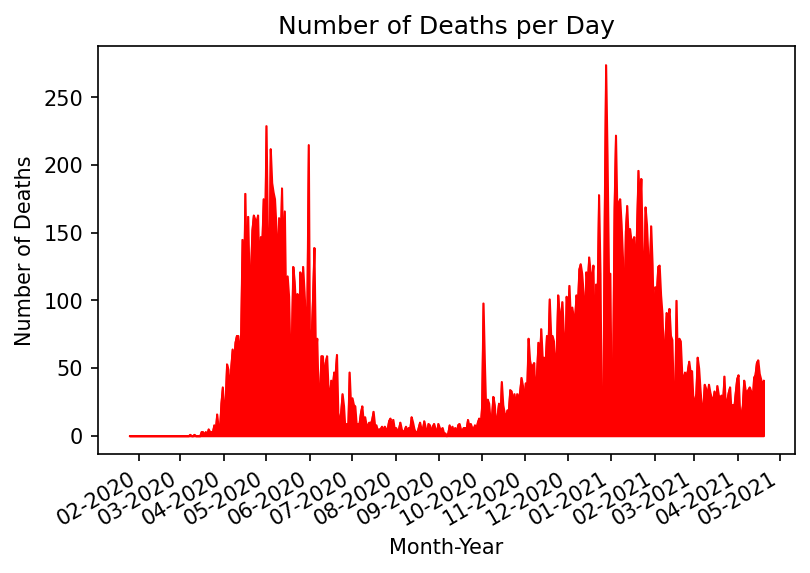

In [15]:
cols2 = [1,6]
df2 = canada_coronavirus[canada_coronavirus.columns[cols2]]
x = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in df2.date_report]
y = df2.deaths

plt.figure(figsize=(30,10))
plt.figure(dpi=150)
plt.plot(x,y,color = 'red',linewidth =0.4)
plt.fill_between(x, y, color='red')
plt.xlabel('Month-Year')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths per Day')
date_form = DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.savefig('deaths.png')

<Figure size 2160x720 with 0 Axes>

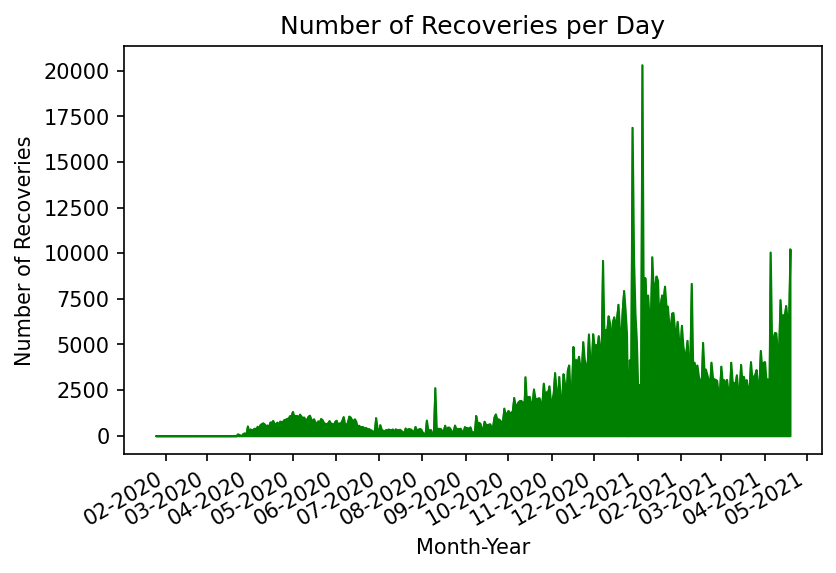

In [16]:
cols3 = [1,4]
df3 = canada_coronavirus[canada_coronavirus.columns[cols3]]
x = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in df3.date_report]
y = df3.recovered

plt.figure(figsize=(30,10))
plt.figure(dpi=150)
plt.plot(x,y,color = 'green',linewidth =0.4)
plt.fill_between(x, y, color='green')
plt.xlabel('Month-Year')
plt.ylabel('Number of Recoveries')
plt.title('Number of Recoveries per Day')
date_form = DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.savefig('recoveries.png')

<Figure size 2160x720 with 0 Axes>

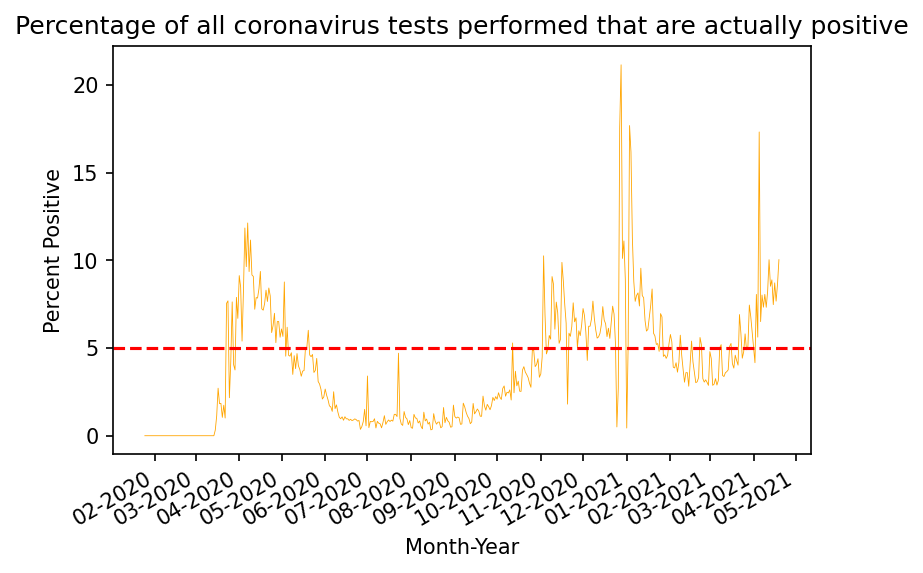

In [17]:
'''
The percent positive is exactly what it sounds like: the percentage of all coronavirus tests performed that are 
actually\npositive, or: (positive tests)/(total tests) x 100%. The percent positive (sometimes called the “percent positive rate” 
or “positivity rate”) helps public health officials answer questions such as\nWhat is the current level of SARS-CoV-2 
(coronavirus) transmission in the community?
Are we doing enough testing for the amount of people who are getting infected?
The percent positive will be high if the number of positive tests is too high, or if the number of total tests is too low. 
A higher percent positive suggests higher transmission and that there are likely more people with coronavirus in the community 
who haven’t been tested yet.

The percent positive is a critical measure because it gives us an indication how widespread infection is in the area where the 
testing is occurring—and whether levels of testing are keeping up with levels of disease transmission.

What does a high percent positive mean?
A high percent positive means that more testing should probably be done—and it suggests that it is not a good time to relax 
restrictions aimed at reducing coronavirus transmission. Because a high percentage of positive tests suggests high coronavirus 
infection rates (due to high transmission in the community), a high percent positive can indicate it may be a good time to add 
restrictions to slow the spread of disease.

How high is too high?
The higher the percent positive is, the more concerning it is. As a rule of thumb, however, one threshold for the percent 
positive being “too high” is 5%. For example, the World Health Organization recommended in May that the percent positive remain 
below 5% for at least two weeks before governments consider reopening. If we are successful in bringing coronavirus transmission
under control, this threshold might be lowered over time. To further relax social restrictions and allow very large gatherings 
or meetings of people traveling from many different areas, for example, we would want a lower threshold.

Does a low percent positive mean that a population has herd immunity?
No. A low percent positive simply means that the level of coronavirus transmission, relative to the amount of testing, is low at
this point in time.

How can we reduce the percent positive when it is too high?
Simply put, there are two ways to lower the percent positive: Reduce the amount of coronavirus transmission or increase the 
number of people who get tested. Fortunately, these two things often go hand-in-hand. If a place is doing more testing—and 
responding appropriately to positive tests, by making sure that people who might be contagious are isolated, for example—the 
amount of transmission should go down over time. But even without testing, measures such as stricter regulations regarding 
wearing masks, physical distancing, and avoiding large gatherings are all effective ways to reduce transmission.

Why does more testing help?
When there is not enough testing in an area, people who are infected with coronavirus don’t get counted, and they don’t know to
isolate themselves. As a result, these people can spread the coronavirus and cause disease in their communities.

'''


cols4 = [1,10]
df4 = canada_coronavirus[canada_coronavirus.columns[cols4]]
x = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in df4.date_report]
y = df4.percent_positive
y2 = 3
plt.figure(figsize=(30,10))
plt.figure(dpi=150)
plt.plot(x,y,color = 'orange',linewidth =0.4)
plt.axhline(y=5, color='r', linestyle='--')
plt.xlabel('Month-Year')
plt.ylabel('Percent Positive')
plt.title('Percentage of all coronavirus tests performed that are actually positive')
date_form = DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.savefig('percent_positive.png')

In [18]:
province_data = pd.read_csv('province_data.csv')

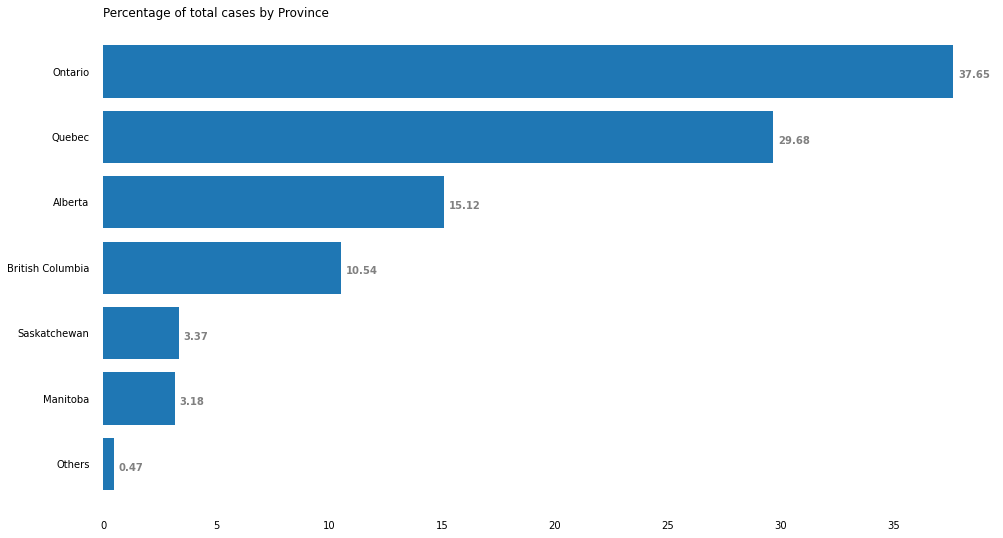

In [19]:
# Read CSV into pandas
data = pd.read_csv("province_data.csv")
df = pd.DataFrame(data)
 
province = df['province']
percent = df['percent']
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(province,percent)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Percentage of total cases by Province',
             loc ='left', )

plt.savefig('percent_province.png') 
# Show Plot
plt.show()


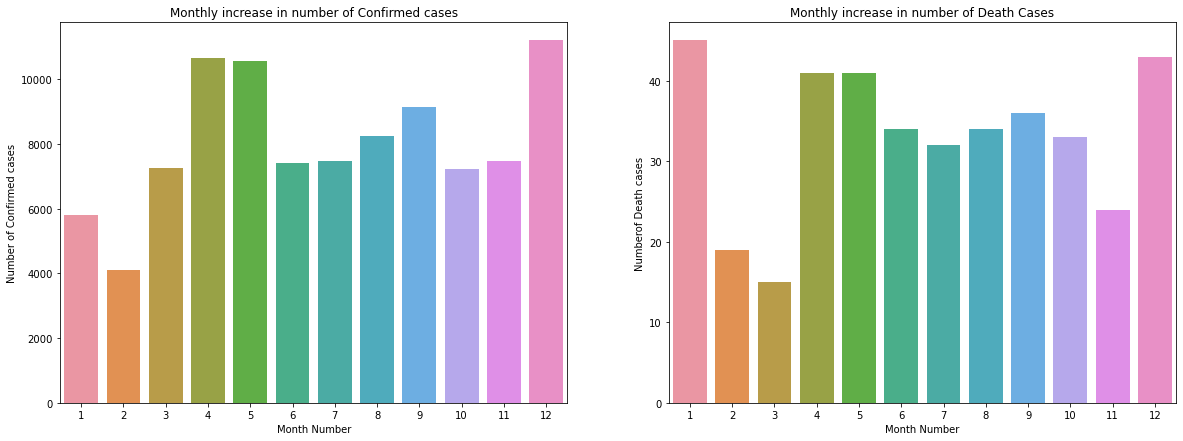

In [29]:

x=datewise["date"].dt.date
datewise["MonthofYear"] = datewise["date"].dt.month
Month_num = []
Monthwise_confirmed = []
Monthwise_recovered = []
Monthwise_deaths = []

w = 1
for i in list(datewise["MonthofYear"].unique()):
    Monthwise_confirmed.append(datewise[datewise["MonthofYear"]==i]["cases"].iloc[-1])
    Monthwise_recovered.append(datewise[datewise["MonthofYear"]==i]["recovered"].iloc[-1])
    Monthwise_deaths.append(datewise[datewise["MonthofYear"]==i]["deaths"].iloc[-1])
    Month_num.append(w)
    w=w+1

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,7))
sns.barplot(x= Month_num,y=pd.Series(Monthwise_confirmed).fillna(0),ax=ax1)
sns.barplot(x= Month_num,y=pd.Series(Monthwise_deaths).fillna(0),ax=ax2)
ax1.set_xlabel("Month Number")
ax2.set_xlabel("Month Number")
ax1.set_ylabel("Number of Confirmed cases")
ax2.set_ylabel("Numberof Death cases")
ax1.set_title("Monthly increase in number of Confirmed cases")
ax2.set_title("Monthly increase in number of Death Cases")
plt.show()

Average increase in number of Confirmed cases everyday: 2526.0
Average increase in number of Recovered cases everyday: 2261.0
Average increase in number of Death cases everyday: 52.0


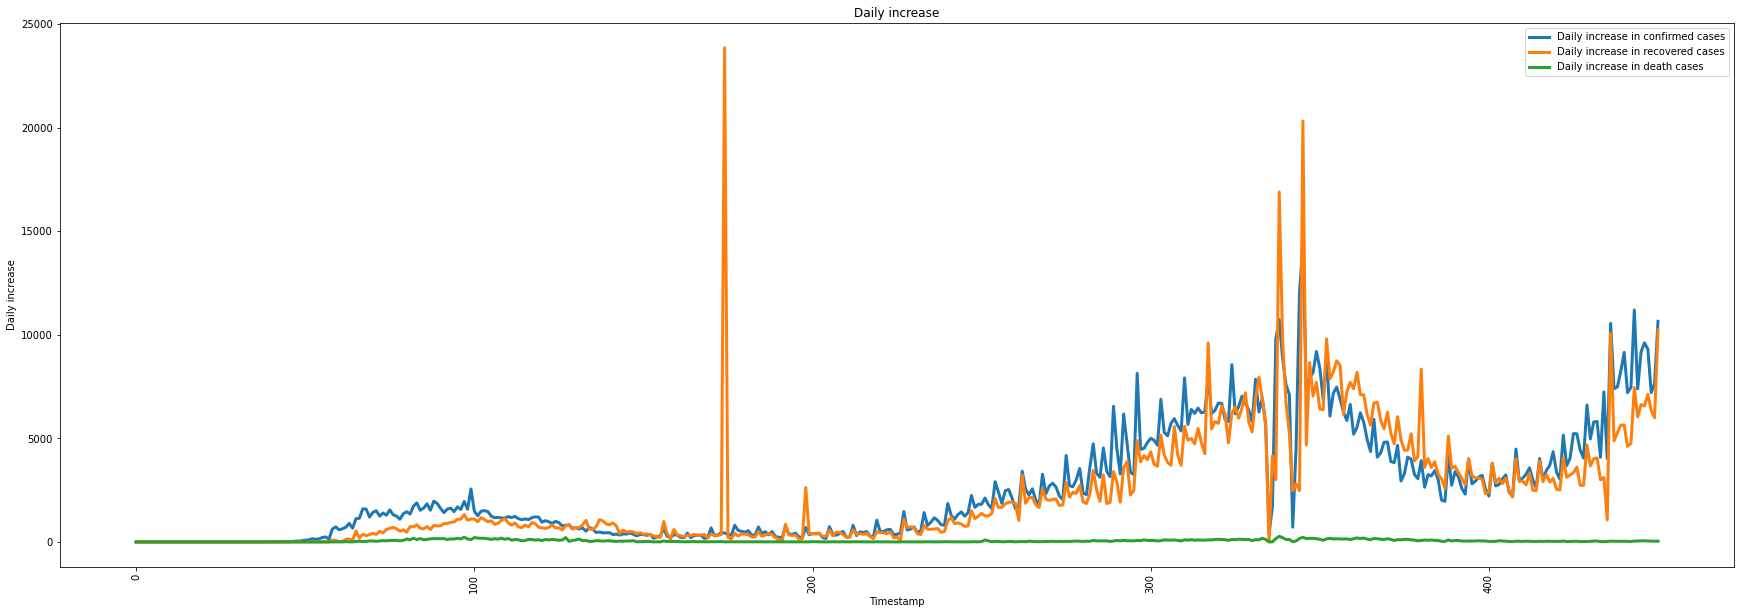

In [31]:
print("Average increase in number of Confirmed cases everyday:",np.round(datewise["cases"].fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(datewise["recovered"].fillna(0).mean()))
print("Average increase in number of Death cases everyday:",np.round(datewise["deaths"].fillna(0).mean()))

plt.figure(figsize=(30,10))
plt.plot(datewise["cases"].fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["recovered"].fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["deaths"].fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.savefig('daily_increment.png')
plt.show()

[Text(0, 0.5, 'Province'),
 Text(0.5, 0, 'Number of Confirmed Cases'),
 Text(0.5, 1.0, 'Top 5 provinces as per number of death cases')]

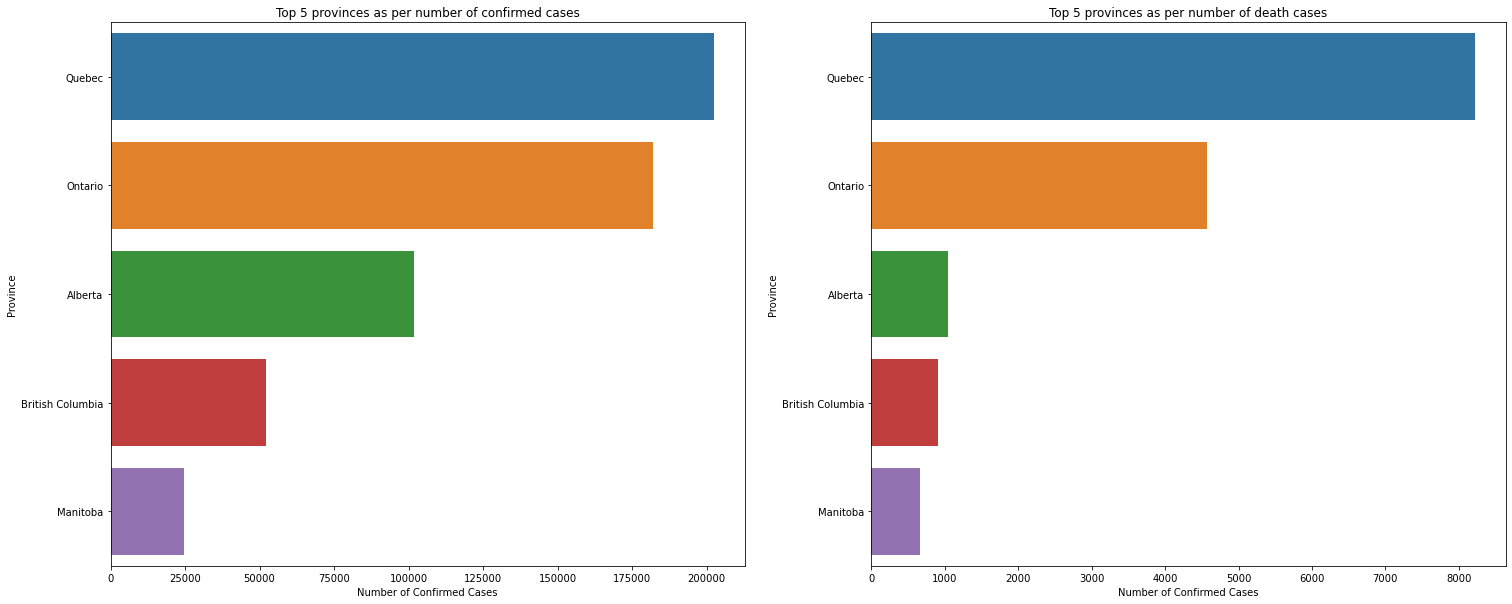

In [22]:
# Calculating Country wise Mortality rate
regionwise= c19[c19["date"]==c19["date"].max()].groupby(["prname"]).agg({"numconf":"sum","numrecover":"sum","numdeaths":"sum"}).sort_values(["numconf"],ascending=False)
regionwise["Mortality"]=(regionwise["numdeaths"]/regionwise["numrecover"])*100
regionwise["recovered"]=(regionwise["numrecover"]/regionwise["numconf"])*100

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_5confirmed = regionwise.sort_values(["numconf"],ascending=False).head(5)
top_5deaths = regionwise.sort_values(["numdeaths"],ascending=False).head(5)
sns.barplot(x=top_5confirmed["numconf"],y=top_5confirmed.index,ax=ax1)
ax1.set(title="Top 5 provinces as per number of confirmed cases", xlabel="Number of Confirmed Cases", ylabel="Province")
sns.barplot(x=top_5deaths["numdeaths"],y=top_5deaths.index,ax=ax2)
ax2.set(title="Top 5 provinces as per number of death cases", xlabel="Number of Confirmed Cases", ylabel="Province")

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

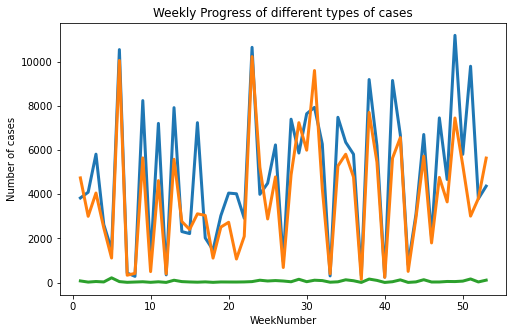

In [23]:
datewise["WeekofYear"] = datewise["date"].dt.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["cases"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth =3)
plt.plot(week_num,weekwise_deaths,linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

In [24]:
weights25 = np.arange(1,26) 
weights50 = np.arange(1,51)
wma25 = df1['cases'].rolling(25).apply(lambda cases: np.dot(cases, weights25)/weights25.sum(), raw=True)
wma50 = df1['cases'].rolling(50).apply(lambda cases: np.dot(cases, weights50)/weights50.sum(), raw=True)
wma25 = np.round_(wma25)
wma50 = np.round_(wma50)
df1['wma25'] = wma25
df1['wma50'] = wma50

<ipython-input-24-37d7ac04bf6b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['wma25'] = wma25
<ipython-input-24-37d7ac04bf6b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['wma50'] = wma50


<Figure size 2160x720 with 0 Axes>

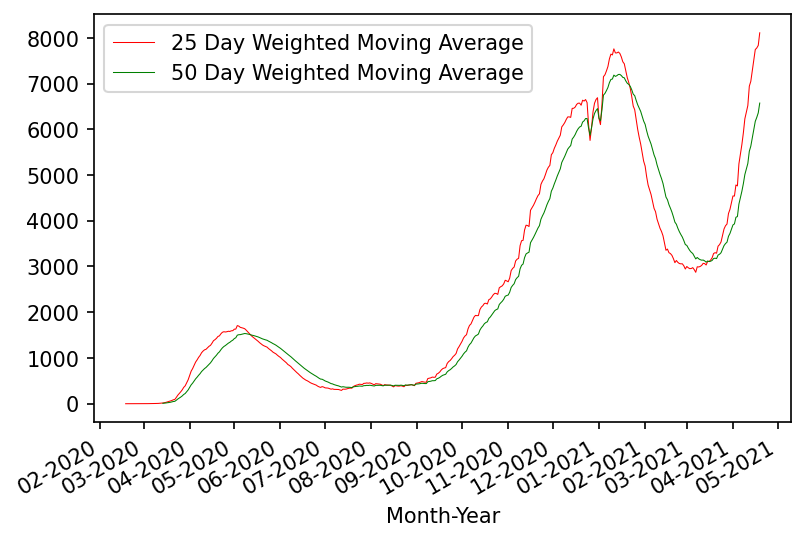

In [25]:
'''
The moving averages is an useful technique to analyse the trend in a time series data. Here we have used the weighted moving 
average i.e. the most recent data point is give more weightage and the wiights decrease backwards. 

We have used the moving average crossover between the 25-DAY WMA AND 50-DAY WMA  to analyse the important events that might 
influence the trends.

From the figure we can conclude that:

-Initially from March to May 2020 there was an continuous and widespread increase in Covid cases as the short term moving average
is higer than the long term average.

-Around May-June 2020 the short term average crosses below the long term average ans cases are decreasing. This is exactly when 
strict Covid restrictions were announced in Canada. Thus we can say Government restrictions led to a decrease in cases.

-Around August-September 2020 the short term average crosses above the long term average with an increase in cases which can be
mainly attributed to incerese in cases after covid restrictions were eased in Canada.

-Around January 2021 the short term average again crosses below the long term average. This can be mainly attributed to some 
provicewise restrictions and also widespread vaccination.

-Around March-April 2021 the short term average crosses above the long term average indicating a new wave of Coronavirus infections.

'''
x = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in df1.date_report]
y = df1.wma25
y2 = df1.wma50
plt.figure(figsize=(30,10))
plt.figure(dpi=150)
plt.plot(x,y,color = 'red',linewidth =0.5)
plt.plot(x,y2,color = 'green',linewidth =0.5)
plt.xlabel('Month-Year')
plt.legend(["25 Day Weighted Moving Average", "50 Day Weighted Moving Average"], loc ="upper left")
date_form = DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.savefig('moving_average.png')

In [26]:
vaccination = pd.read_csv('Vaccine_administration.csv')
#vaccination.drop([127,128,129],axis=0,inplace=True)
vaccination
cols = [1,3,4,5]
df5 = vaccination[vaccination.columns[cols]]

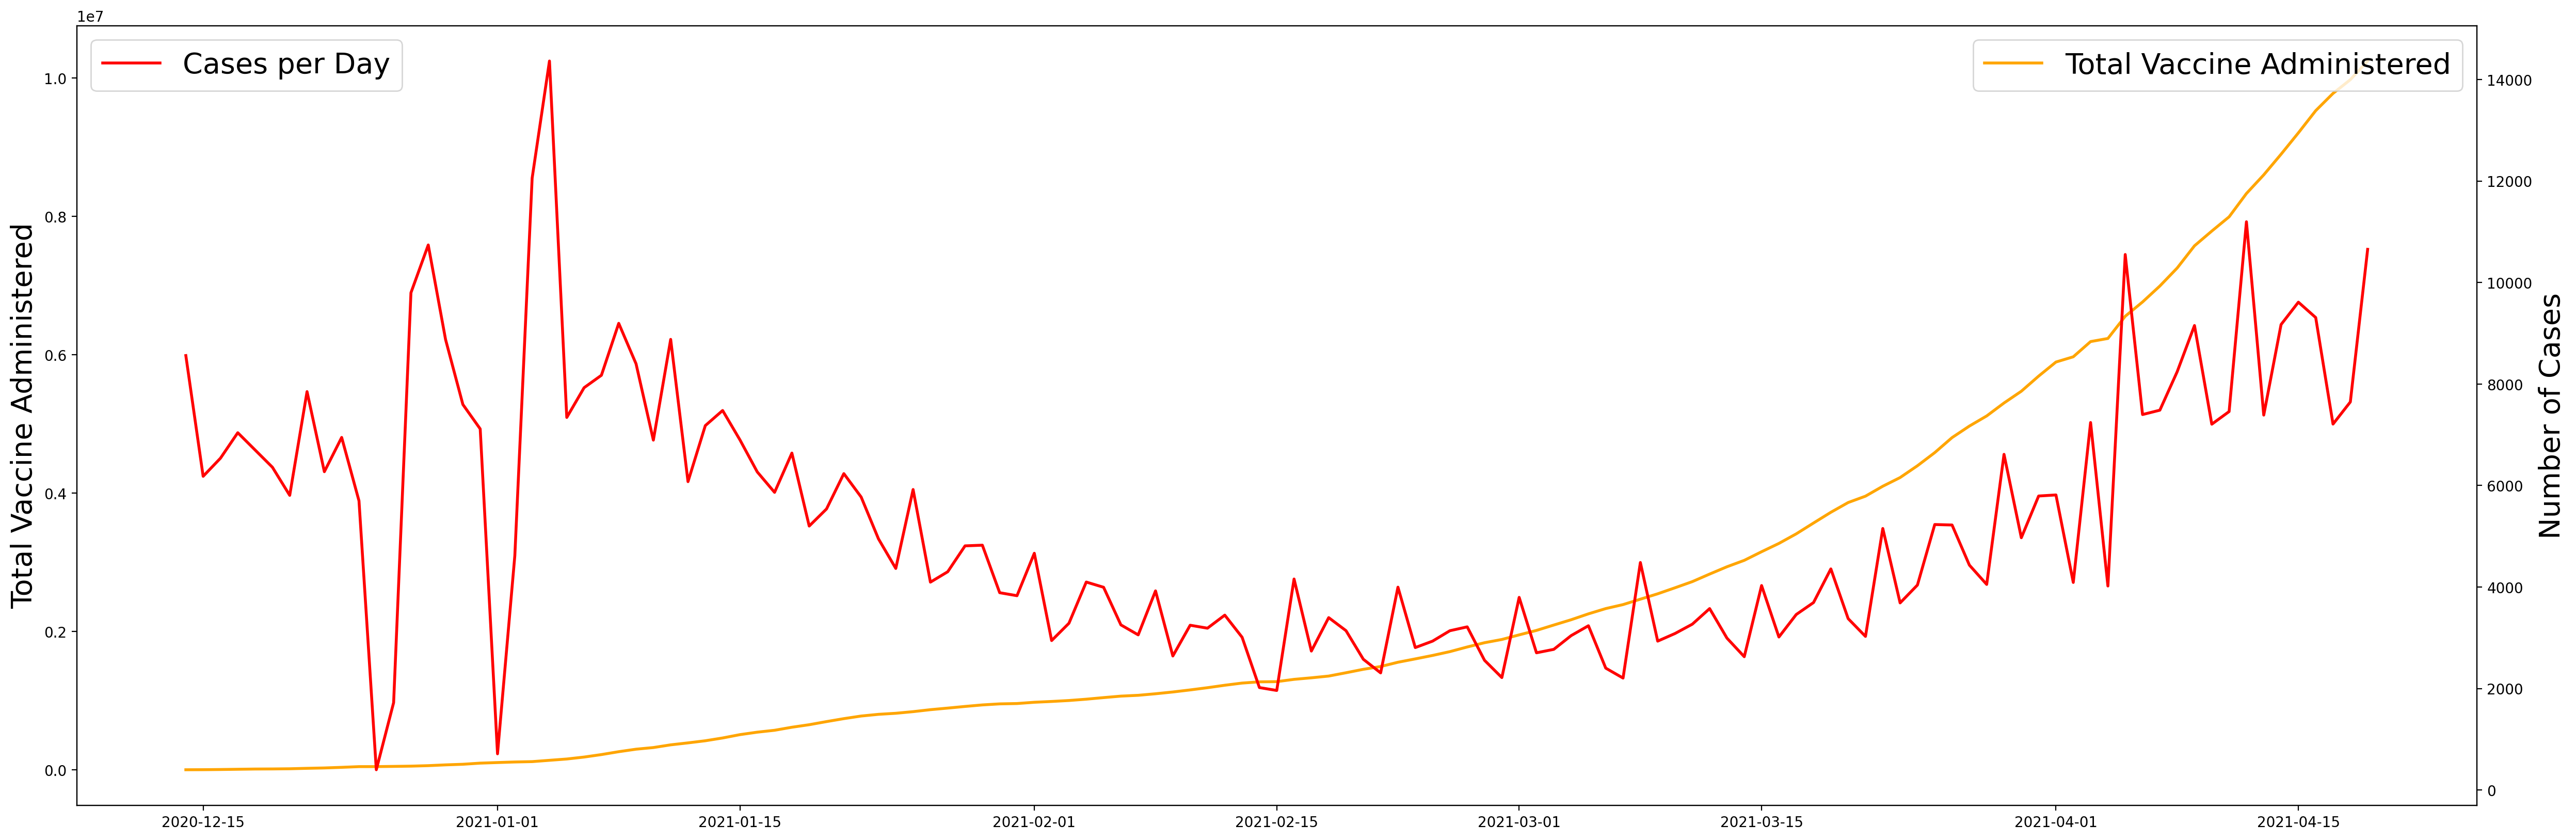

In [27]:
'''
The below plot shows how the vaccination has affected the total case count.

As can be seen with an increase in vaccination there was a decrease in the number of cases initially but the case count started
increasing thereafter.
Thus we cannot conclude whether vaccination can lead to decrease in the number of infections spreading.

'''
x = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in df5.date_vaccine_administered]
y = df5.cumulative_avaccine
y2 = df5.cases


fig = plt.figure(figsize=(30,10),dpi=200)

ax1 = fig.add_subplot(111)
ax1.plot(x,y,color = 'orange',linewidth =2)
ax1.set_ylabel('Total Vaccine Administered',fontsize=20)
plt.legend(["Total Vaccine Administered"], loc ="upper right",fontsize=20)

ax2 = ax1.twinx()
ax2.plot(x,y2,color = 'red',linewidth =2)
ax2.set_ylabel('Number of Cases',fontsize=20)
        

#date_form = DateFormatter("%m-%Y")
#plt.gca().xaxis.set_major_formatter(date_form)
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#plt.gcf().autofmt_xdate()
plt.legend(["Cases per Day"], loc ="upper left",fontsize=20)
plt.savefig('Vaccination_vs_Cases.png')

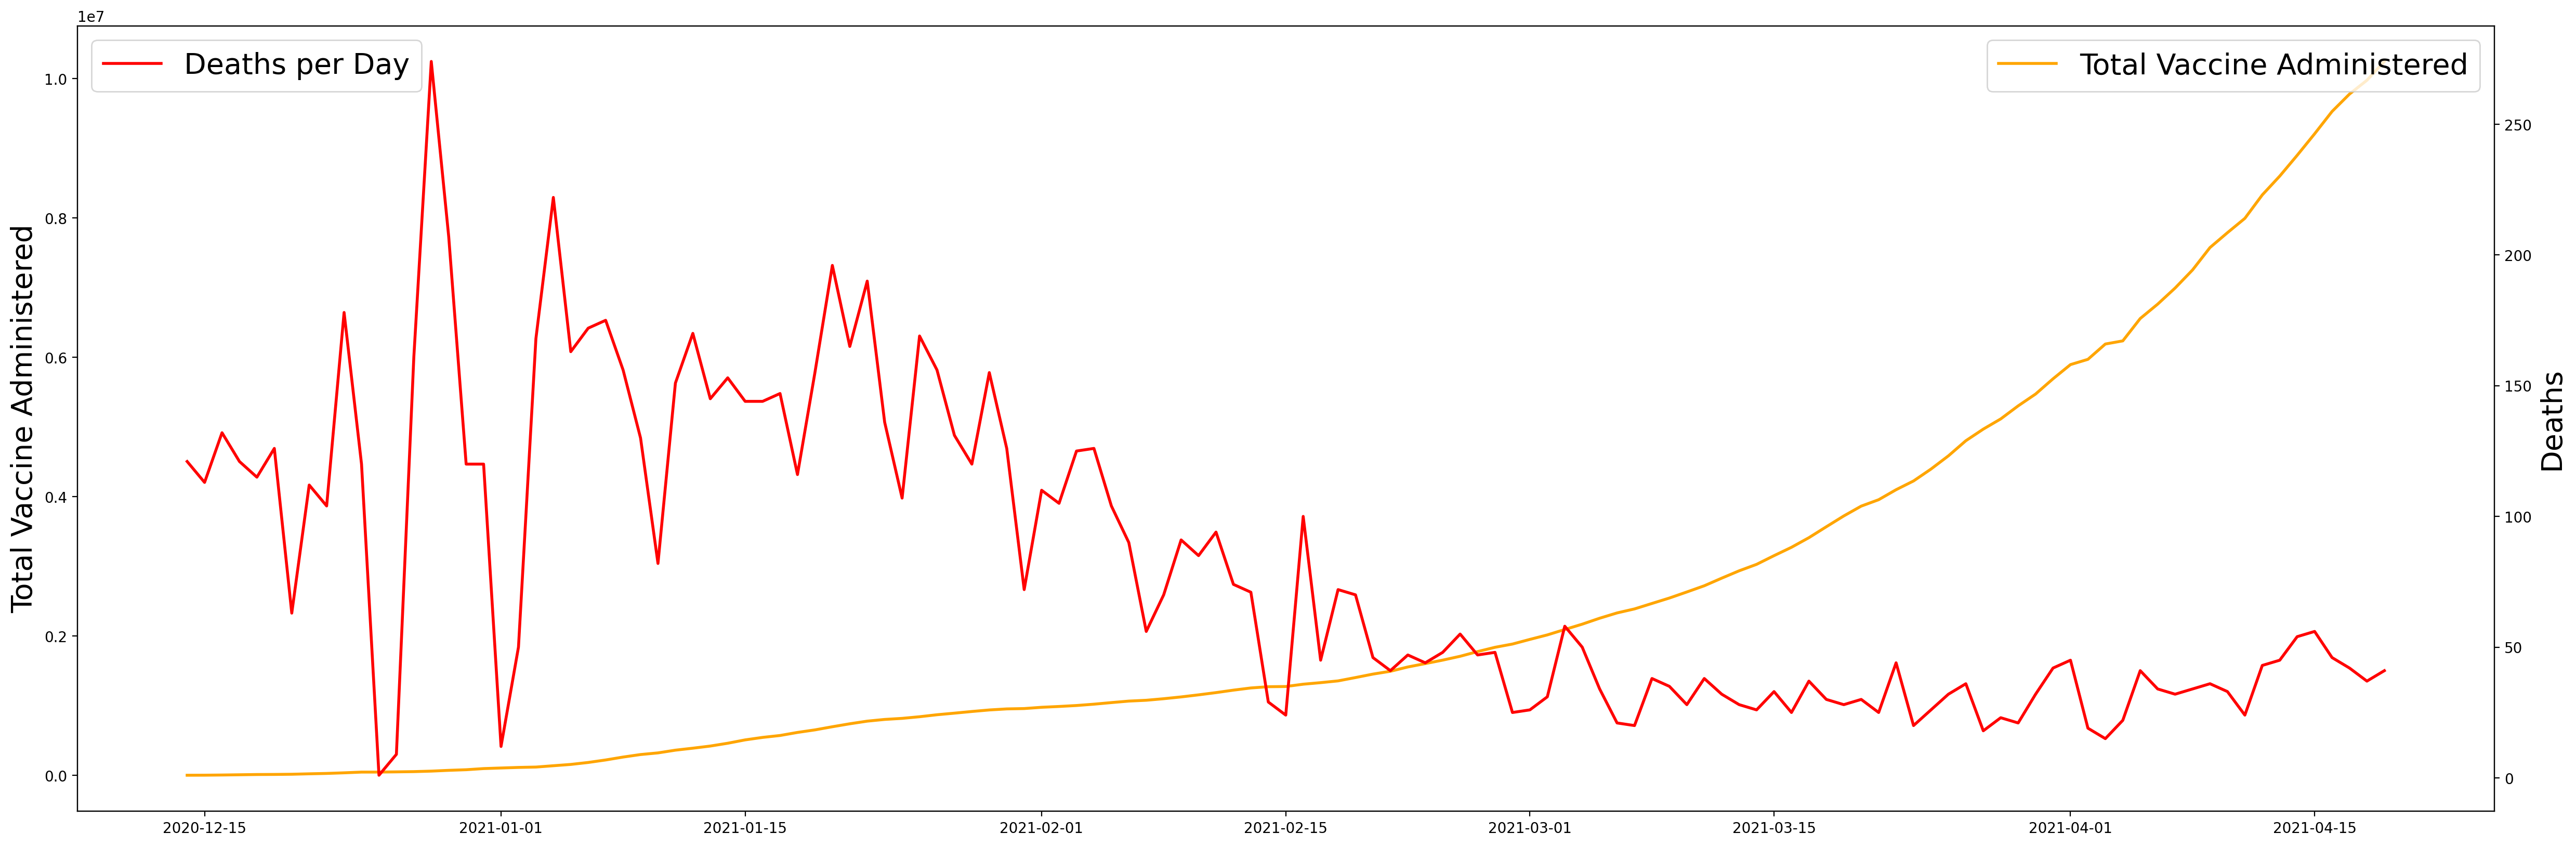

In [32]:
'''
The below plot shows how the vaccination has affected the total death count.

It is clear from the graph that the increase in vaccination and certainly led to a decrease in the deaths.
Thus widespread vaccination can be concluded to be an effective measure to curb the Covid related deaths.

'''
x = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in df5.date_vaccine_administered]
y = df5.cumulative_avaccine
y2 = df5.deaths


fig = plt.figure(figsize=(30,10),dpi=200)

ax1 = fig.add_subplot(111)
ax1.plot(x,y,color = 'orange',linewidth =2)
ax1.set_ylabel('Total Vaccine Administered',fontsize=20)
plt.legend(["Total Vaccine Administered"], loc ="upper right",fontsize=20)

ax2 = ax1.twinx()
ax2.plot(x,y2,color = 'red',linewidth =2)
ax2.set_ylabel('Deaths',fontsize=20)
        

#date_form = DateFormatter("%m-%Y")
#plt.gca().xaxis.set_major_formatter(date_form)
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#plt.gcf().autofmt_xdate()
plt.legend(["Deaths per Day"], loc ="upper left",fontsize=20)
plt.savefig('Vaccination_vs_Death.png')

In [33]:
data = pd.read_csv("age_group.csv")
df = pd.DataFrame(data)
df.drop([8,9],axis=0,inplace=True) 
age = df['Age']
percent = df['Percent']
df

,Age,Count,Percent,Unnamed: 3,Unnamed: 4
0,<20,121762.0,10.567022,NaN,NaN
1,20-29,150251.0,13.039418,NaN,NaN
2,30-39,124627.0,10.815659,NaN,NaN
3,40-49,107936.0,9.367143,NaN,NaN
4,50-59,99190.0,8.608128,NaN,NaN
5,60-69,62453.0,5.419936,NaN,NaN
6,70-79,31622.0,2.744291,NaN,NaN
7,80+,19408.0,1.684308,NaN,NaN


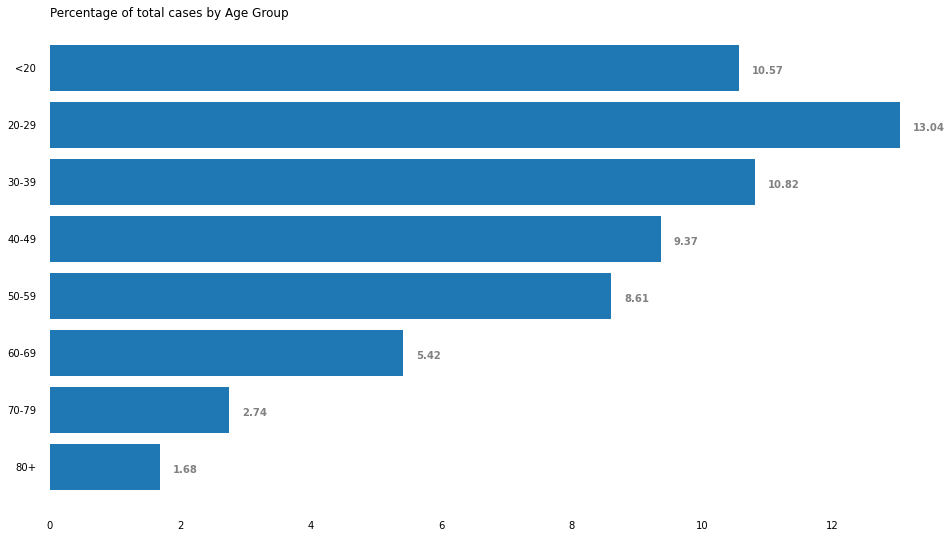

In [34]:

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(age,percent)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Percentage of total cases by Age Group',
             loc ='left', )

plt.savefig('percent_age.png') 
# Show Plot
plt.show()

In [35]:
max_quebec = 100000

quebec_data = c19[c19["prname"]=="Quebec"]
ontario_data = c19[c19["prname"]=="Ontario"]
alberta_data = c19[c19["prname"]=="Alberta"]
british_columbia_data = c19[c19["prname"]=="British Columbia"]
manitoba_data = c19[c19["prname"]=="Manitoba"]

datewise_quebec=quebec_data.groupby(["date"]).agg({"numconf":"sum","numrecover":"sum","numdeaths":"sum"})
datewise_ontario = ontario_data.groupby(["date"]).agg({"numconf":"sum","numrecover":"sum","numdeaths":"sum"})
datewise_alberta = alberta_data.groupby(["date"]).agg({"numconf":"sum","numrecover":"sum","numdeaths":"sum"})
datewise_british_columbia=british_columbia_data.groupby(["date"]).agg({"numconf":"sum","numrecover":"sum","numdeaths":"sum"})
datewise_manitob=manitoba_data.groupby(["date"]).agg({"numconf":"sum","numrecover":"sum","numdeaths":"sum"})

print("It took",datewise_quebec[(datewise_quebec["numconf"]>0)&(datewise_quebec["numconf"]<=max_quebec)].shape[0],"days in Quebec to reach",max_quebec," number of Confirmed Cases")
print("It took",datewise_ontario[(datewise_ontario["numconf"]>0)&(datewise_ontario["numconf"]<=max_quebec)].shape[0],"days in Ontario to reach",max_quebec," number of Confirmed Cases")
print("It took",datewise_alberta[(datewise_alberta["numconf"]>0)&(datewise_alberta["numconf"]<=max_quebec)].shape[0],"days in Alberta to reach ",max_quebec,"number of Confirmed Cases")
print("It took",datewise_manitob[(datewise_manitob["numconf"]>0)&(datewise_manitob["numconf"]<=max_quebec)].shape[0],"days in Manitob to reach ",max_quebec,"number of Confirmed Cases")
print("It took",datewise_british_columbia[(datewise_british_columbia["numconf"]>0)&(datewise_british_columbia["numconf"]<=max_quebec)].shape[0],"days in British Columbia to reach",max_quebec," number of Confirmed Cases")

It took 235 days in Quebec to reach 100000  number of Confirmed Cases
It took 270 days in Ontario to reach 100000  number of Confirmed Cases
It took 296 days in Alberta to reach  100000 number of Confirmed Cases
It took 403 days in Manitob to reach  100000 number of Confirmed Cases
It took 401 days in British Columbia to reach 100000  number of Confirmed Cases
